In [3]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import pandas as pd
import itertools

from kernels_class import *
from rbf_kernel import *
from generation import *

In [13]:
def plot_boxplots(res, gamma_seq):
    fig, axes = plt.subplots(
        nrows=3, ncols=2, 
        sharex=True, 
        figsize=(12, 6),
        gridspec_kw={"height_ratios": [1, 3, 3]}  # histogram is shorter
    )
    flierprops = dict(marker='o', markersize=1, linestyle='none', markerfacecolor='darkgray', alpha=0.5)

    # res['gamma'] = pd.to_numeric(res['gamma'], errors='coerce')

    for est_type_ind in range(2):
        est_type = np.array(['nrm', 'ipr'])[est_type_ind]

        # Histogram at the top
        gamma_min = gamma_seq[res[['seed', 'var_rbf_'+est_type]].groupby('seed').aggregate(np.argmin)]
        sns.histplot(gamma_min, ax=axes[0,est_type_ind], bins=20)
        axes[0,est_type_ind].set_ylabel("Count")
        axes[0,est_type_ind].set_title('Arg min of the estimated RBF variance on a grid - pi_'+est_type)

        # Boxplot or Lineplot below
        grouped = res.groupby('gamma')['var_rbf_'+est_type].apply(list)
        x_vals = grouped.index.values
        y_vals = grouped.values
        axes[1,est_type_ind].boxplot(y_vals, positions=x_vals, widths=0.0025, flierprops=flierprops)
        sns.lineplot(res, x='gamma', y='var_rbf', color='black', ax=axes[1,est_type_ind])
        axes[1,est_type_ind].set_ylabel("var_rbf")
        axes[1,est_type_ind].set_title('True RBF variances - estimated means, cov. matrices and pi_'+est_type)

        # Boxplot or Lineplot below
        if est_type_ind == 0:
            grouped = res.groupby('gamma')['var_plug-in'].apply(list)
        if est_type_ind == 1:
            grouped = res.groupby('gamma')['var_explicit'].apply(list)
        x_vals = grouped.index.values
        y_vals = grouped.values
        axes[2,est_type_ind].boxplot(y_vals, positions=x_vals, widths=0.0025, flierprops=flierprops)
        sns.lineplot(res, x='gamma', y='var_rbf', color='black', ax=axes[2,est_type_ind])
        axes[2,est_type_ind].set_ylabel("var_rbf")
        if est_type_ind == 0:
            axes[2,est_type_ind].set_title('Estimated variances - plug-in')
        if est_type_ind == 1:
            axes[2,est_type_ind].set_title('Estimated variances - explicit')



        axes[2,est_type_ind].xaxis.set_major_locator(MaxNLocator(nbins=6))
        axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])
        buffer = 0.01  # Or adjust based on your data scale
        axes[2,est_type_ind].set_xlim(res['gamma'].min() - buffer, res['gamma'].max() + buffer)

    axes[1,0].set_ylabel('RBF_var(hat pi_nrm)')
    axes[1,1].set_ylabel('RBF_var(hat pi_ipr)')
    axes[2,0].set_ylabel('hat gamma plug-in')
    axes[2,1].set_ylabel('hat gamma explicit')

    plt.tight_layout()
    plt.show()

# sim1: n=500

In [8]:
params = {'beta': [1],
          'n_plus': [500],
          'n_minus': [500], 
          'n_target': [500], 
          'pi_target': [0.1, 0.3, 0.5, 0.7, 0.9],
          'p': [int(5)],
          'seed': [int(i) for i in np.linspace(1, 100, 100)]}

In [9]:
df_params = pd.DataFrame(itertools.product(*params.values()),columns=params.keys())

In [10]:
gamma_seq = np.linspace(0.005, 0.2, 30)

In [11]:
res = simulation_gamma(df_params, generate_sample_Nstd_Nstd_CC, params.keys(), gamma_seq,
           ['pi_nmr_u', 'pi_ipr_u',
            'var_plug-in', 'var_explicit', 
            'var_rbf', 'var_rbf_estimate'])

100%|██████████| 500/500 [00:29<00:00, 17.10it/s]


pi_target = 0.1


/tmp/ipykernel_44411/3411038071.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])
/tmp/ipykernel_44411/3411038071.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])


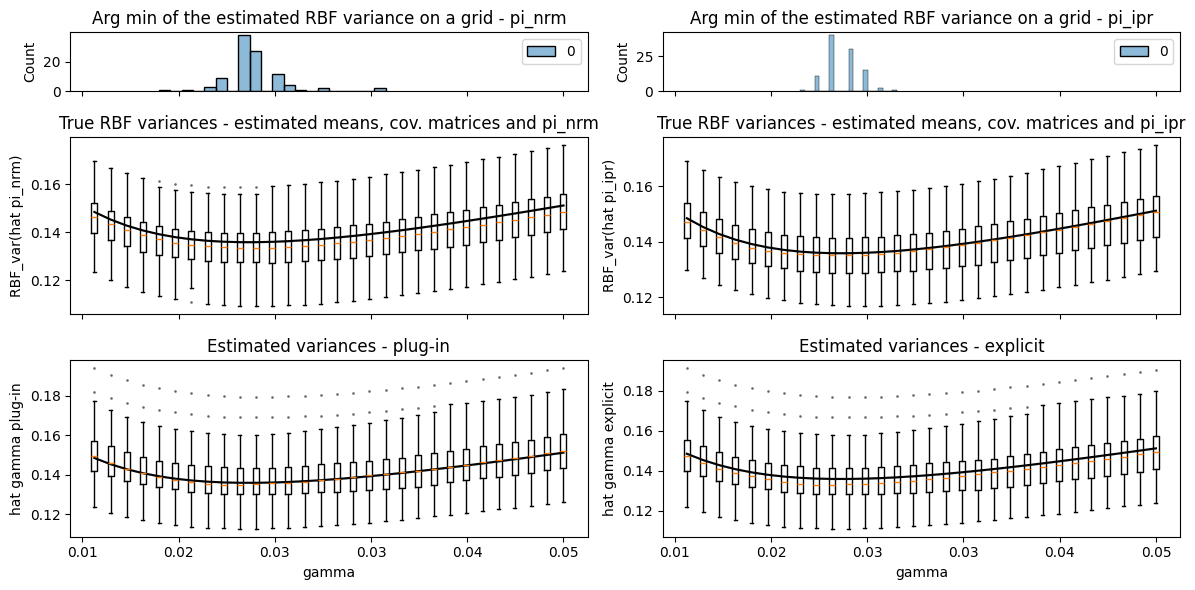

pi_target = 0.3


/tmp/ipykernel_44411/3411038071.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])
/tmp/ipykernel_44411/3411038071.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])


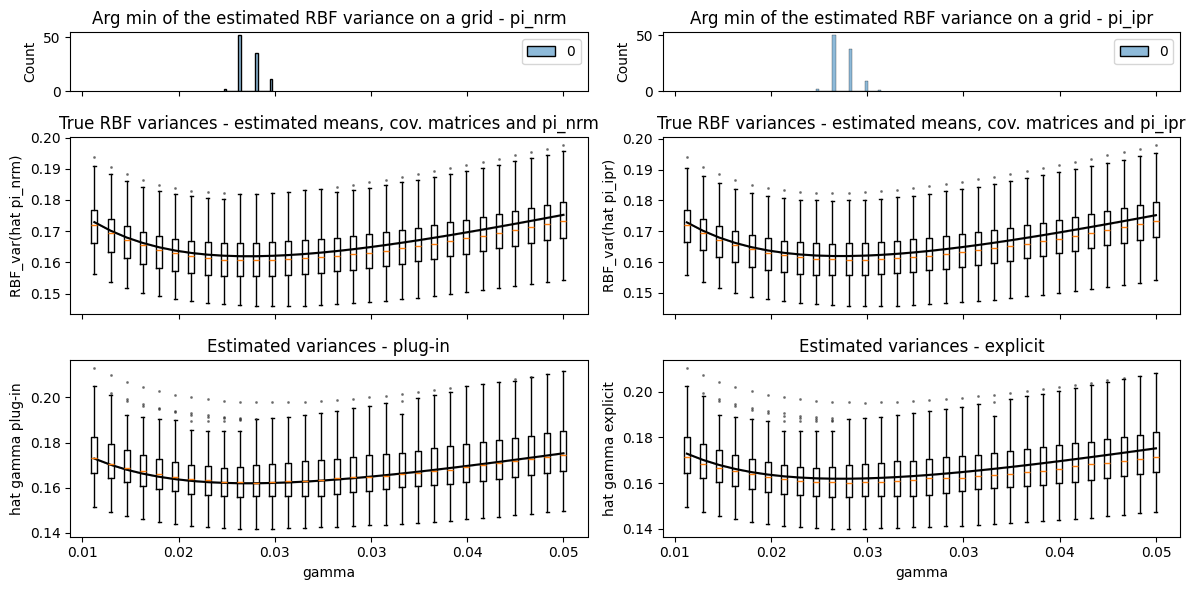

pi_target = 0.5


/tmp/ipykernel_44411/3411038071.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])
/tmp/ipykernel_44411/3411038071.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])


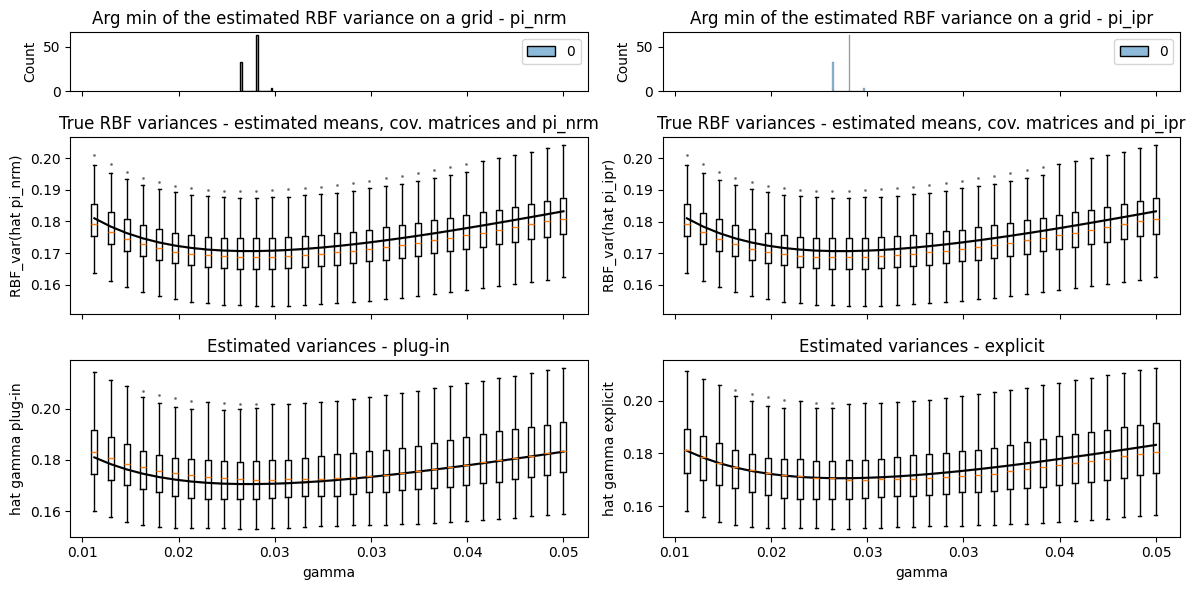

pi_target = 0.7


/tmp/ipykernel_44411/3411038071.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])
/tmp/ipykernel_44411/3411038071.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])


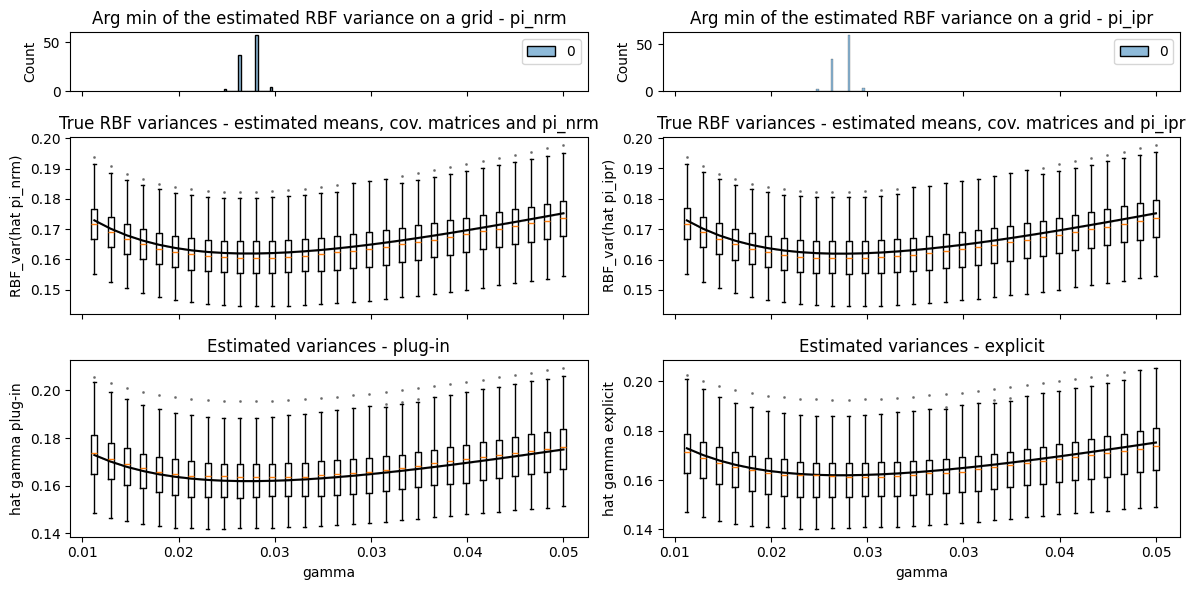

pi_target = 0.9


/tmp/ipykernel_44411/3411038071.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])
/tmp/ipykernel_44411/3411038071.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])


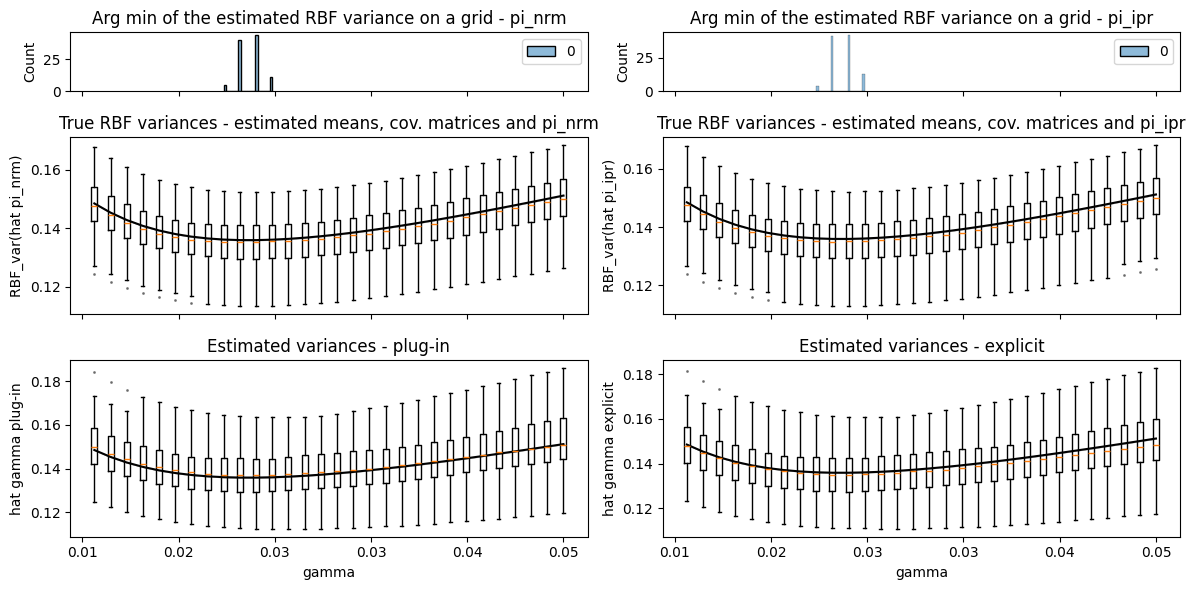

In [14]:
for i in [0.1, 0.3, 0.5, 0.7, 0.9]:
    print('pi_target = '+str(i))
    plot_boxplots(res[res['pi_target'] == i], gamma_seq)

# sim2: n=250

In [19]:
params = {'beta': [1],
          'n_plus': [250],
          'n_minus': [250], 
          'n_target': [250], 
          'pi_target': [0.1, 0.3, 0.5, 0.7, 0.9],
          'p': [int(5)],
          'seed': [int(i) for i in np.linspace(1, 100, 100)]}

In [20]:
df_params = pd.DataFrame(itertools.product(*params.values()),columns=params.keys())

In [49]:
gamma_seq = np.linspace(0.005, 0.5, 50)

In [48]:
np.sqrt(1/(2*np.linspace(0.005, 0.5, 50)))

array([10.        ,  5.75396456,  4.45399334,  3.76322331,  3.31831824,
        3.00122524,  2.76053052,  2.56978084,  2.4137931 ,  2.28314826,
        2.17165217,  2.07504208,  1.99027547,  1.91511479,  1.84787287,
        1.78725022,  1.73222757,  1.68199266,  1.63588913,  1.59338009,
        1.55402148,  1.51744245,  1.48333052,  1.45142027,  1.42148463,
        1.393328  ,  1.36678088,  1.34169555,  1.3179426 ,  1.29540812,
        1.27399136,  1.25360289,  1.23416296,  1.21560025,  1.19785069,
        1.1808566 ,  1.16456587,  1.14893129,  1.13390995,  1.11946279,
        1.10555413,  1.09215134,  1.07922447,  1.06674601,  1.05469062,
        1.04303492,  1.03175731,  1.02083776,  1.01025774,  1.        ])

In [50]:
res = simulation_gamma(df_params, generate_sample_Nstd_Nstd_CC, params.keys(), gamma_seq,
           ['pi_nmr_u', 'pi_ipr_u',
            'var_plug-in', 'var_explicit', 
            'var_rbf', 'var_rbf_estimate'])

100%|██████████| 500/500 [00:05<00:00, 83.52it/s]


pi_target = 0.1


/tmp/ipykernel_16426/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])
/tmp/ipykernel_16426/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])


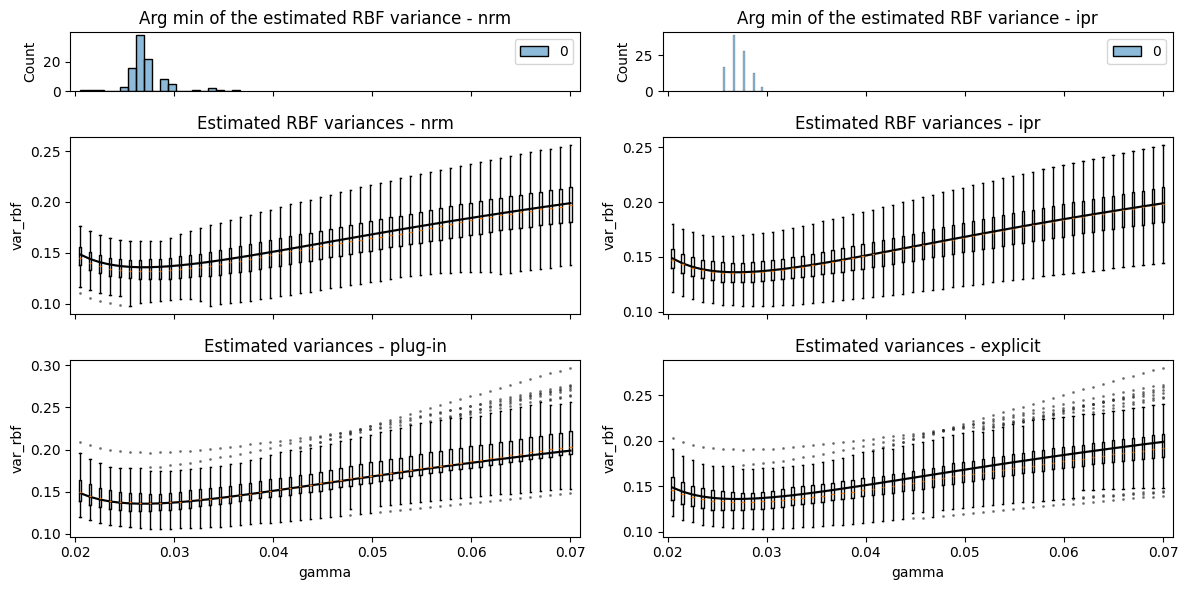

pi_target = 0.3


/tmp/ipykernel_16426/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])
/tmp/ipykernel_16426/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])


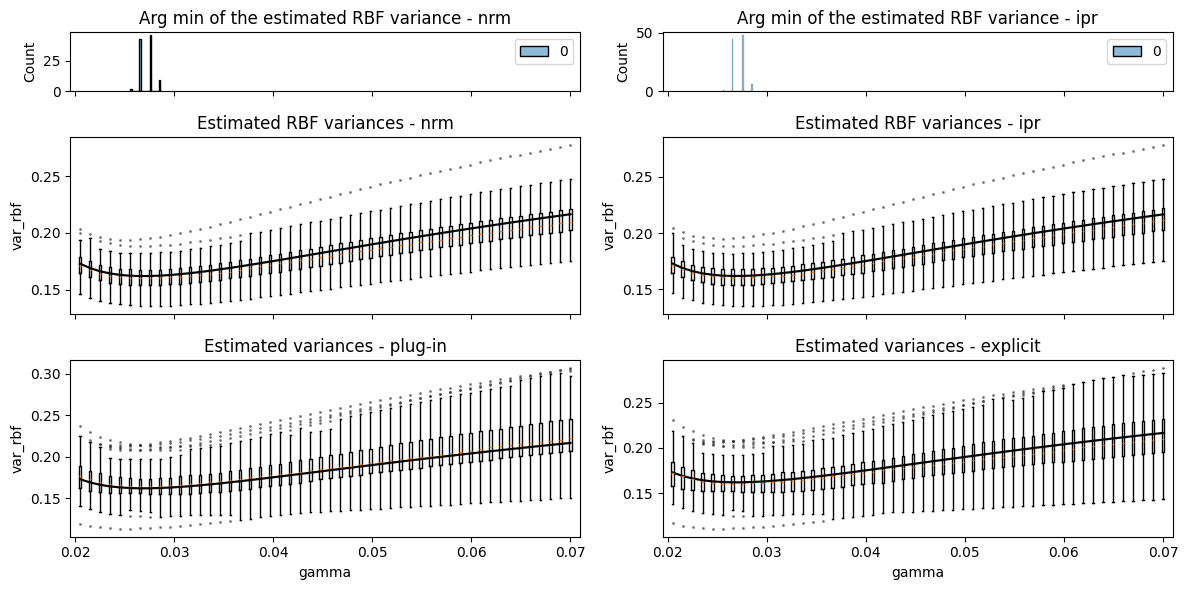

pi_target = 0.5


/tmp/ipykernel_16426/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])
/tmp/ipykernel_16426/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])


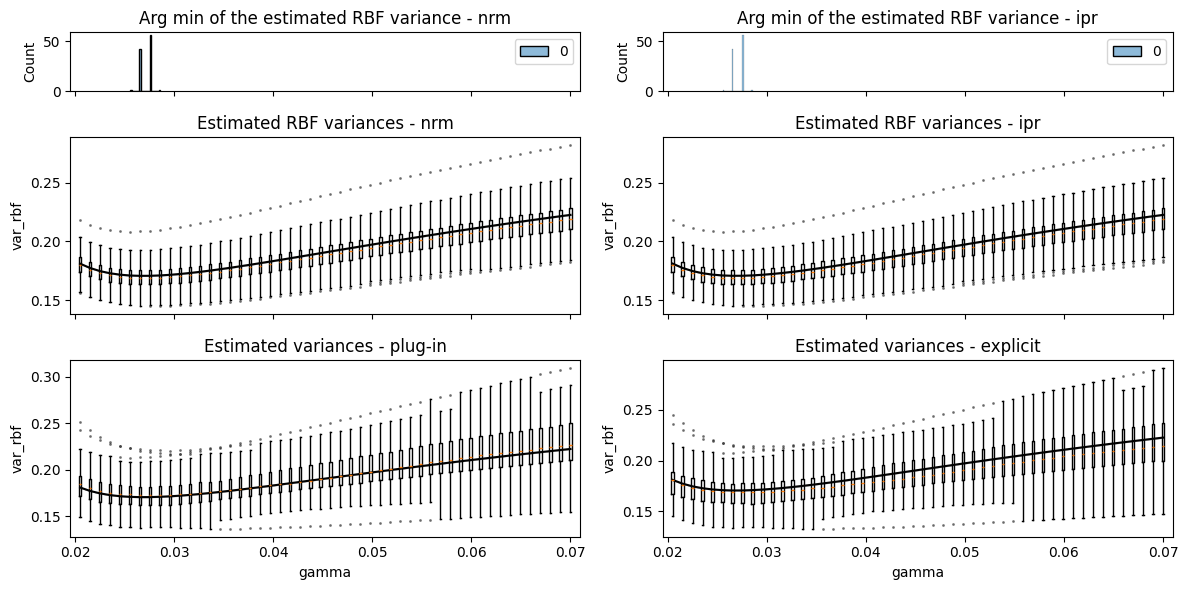

pi_target = 0.7


/tmp/ipykernel_16426/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])
/tmp/ipykernel_16426/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])


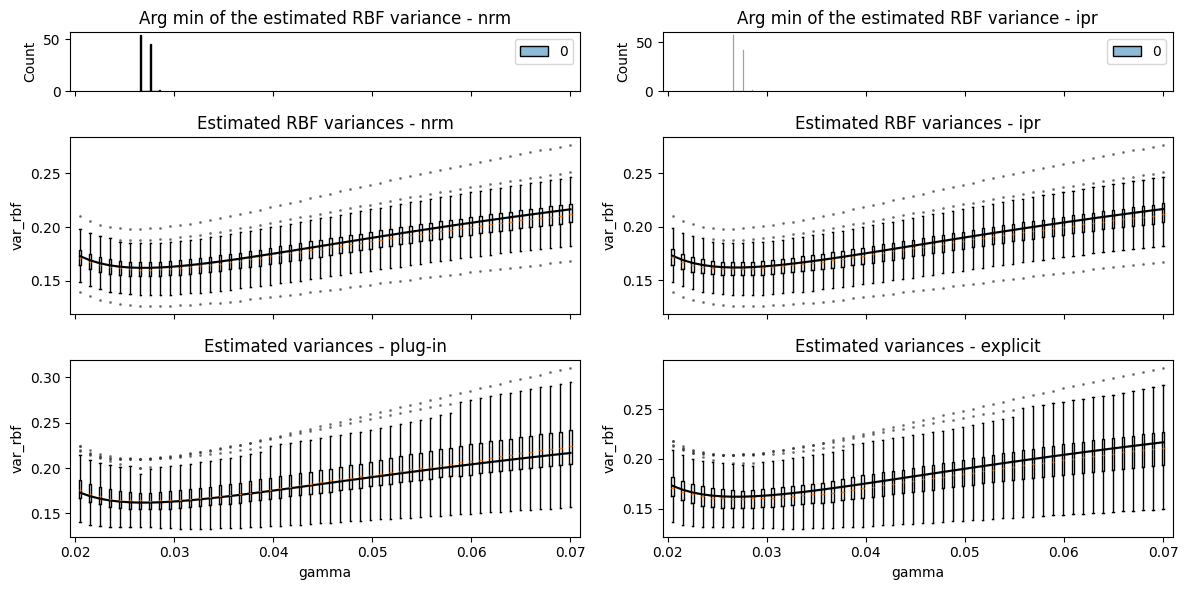

pi_target = 0.9


/tmp/ipykernel_16426/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])
/tmp/ipykernel_16426/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])


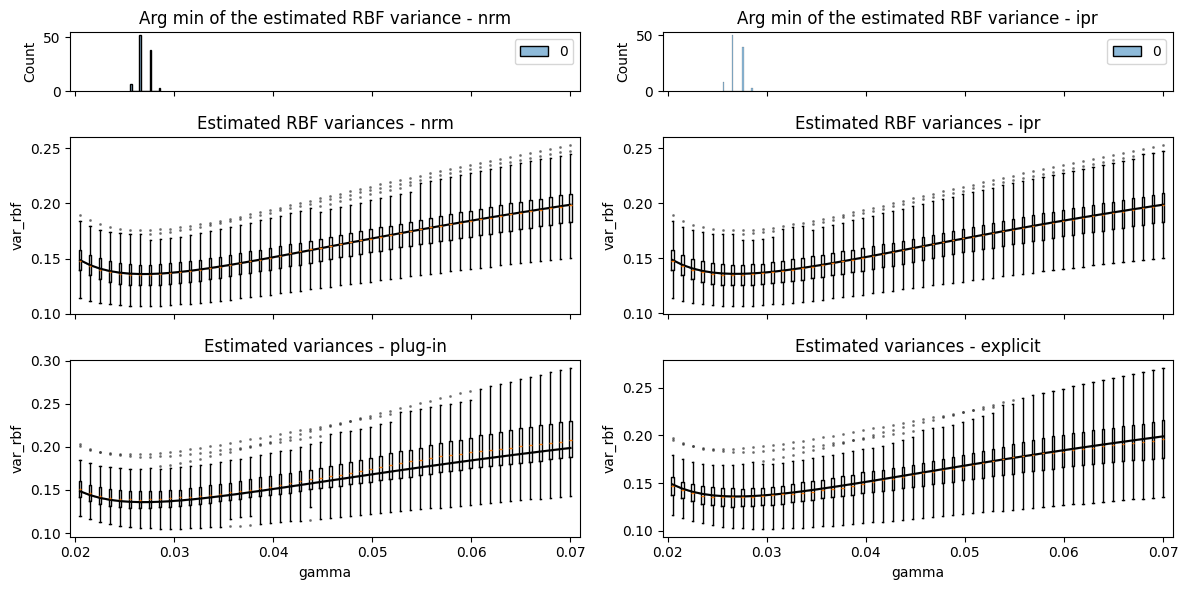

In [51]:
for i in [0.1, 0.3, 0.5, 0.7, 0.9]:
    print('pi_target = '+str(i))
    plot_boxplots(res[res['pi_target'] == i], gamma_seq)

# sim3: n=500, p diff

In [4]:
params = {'beta': [1],
          'n_plus': [500],
          'n_minus': [500], 
          'n_target': [500], 
          'pi_target': [0.5],
          'p': [int(i) for i in [5, 10, 15, 20, 50, 100]],
          'seed': [int(i) for i in np.linspace(1, 100, 100)]}

In [5]:
df_params = pd.DataFrame(itertools.product(*params.values()),columns=params.keys())

In [6]:
gamma_seq = np.linspace(0.005, 0.5, 50)

In [7]:
res = simulation_gamma(df_params, generate_sample_Nstd_Nstd_CC, params.keys(), gamma_seq,
           ['pi_nmr_u', 'pi_ipr_u',
            'var_plug-in', 'var_explicit', 
            'var_rbf', 'var_rbf_estimate'])

 82%|████████▏ | 493/600 [00:39<00:09, 11.22it/s]/home/gosia/miniconda3/envs/rhks/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2430: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/gosia/miniconda3/envs/rhks/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2430: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/gosia/miniconda3/envs/rhks/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2430: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/gosia/miniconda3/envs/rhks/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2430: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/gosia/miniconda3/envs/rhks/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2430: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/gosia/miniconda3/envs/rhk

p = 5


/tmp/ipykernel_326499/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])
/tmp/ipykernel_326499/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])


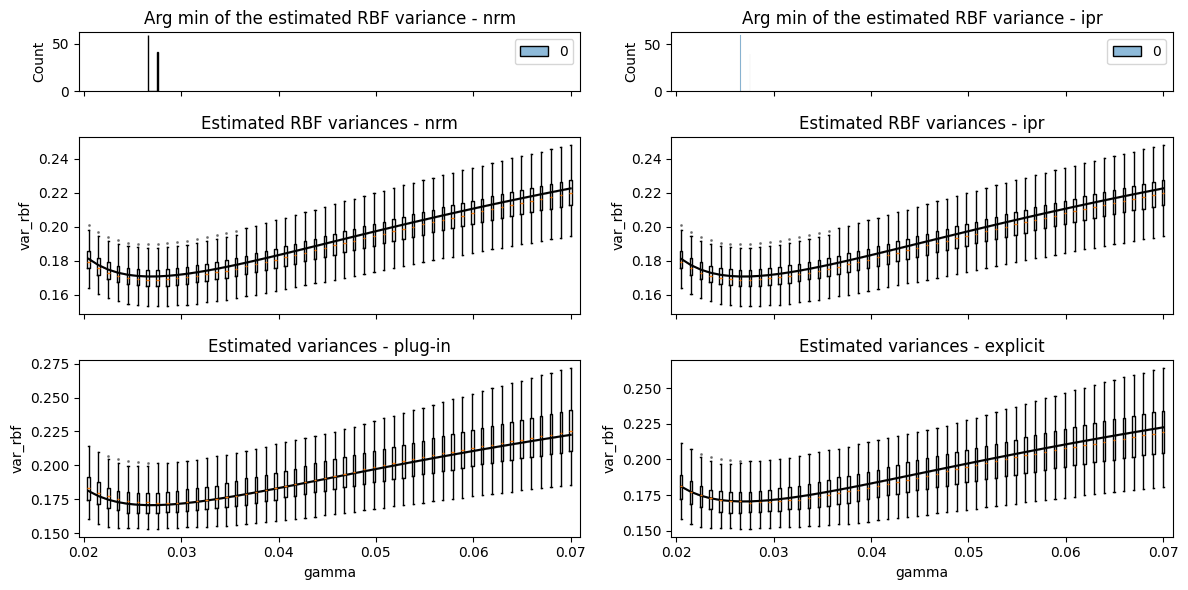

p = 10


/tmp/ipykernel_326499/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])
/tmp/ipykernel_326499/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])


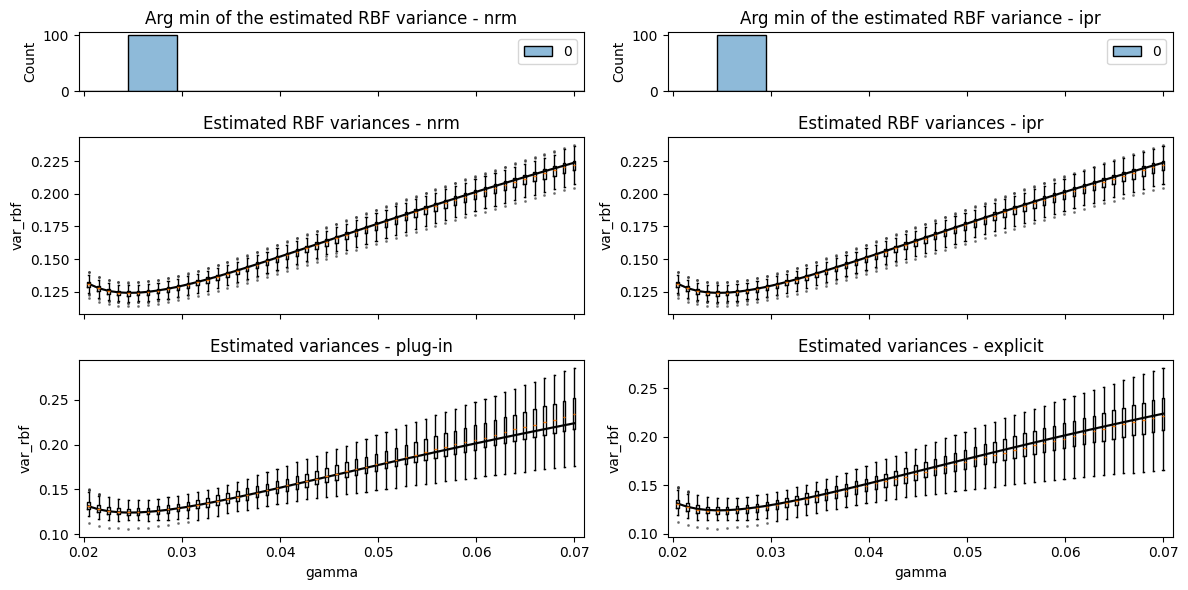

p = 15


/tmp/ipykernel_326499/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])
/tmp/ipykernel_326499/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])


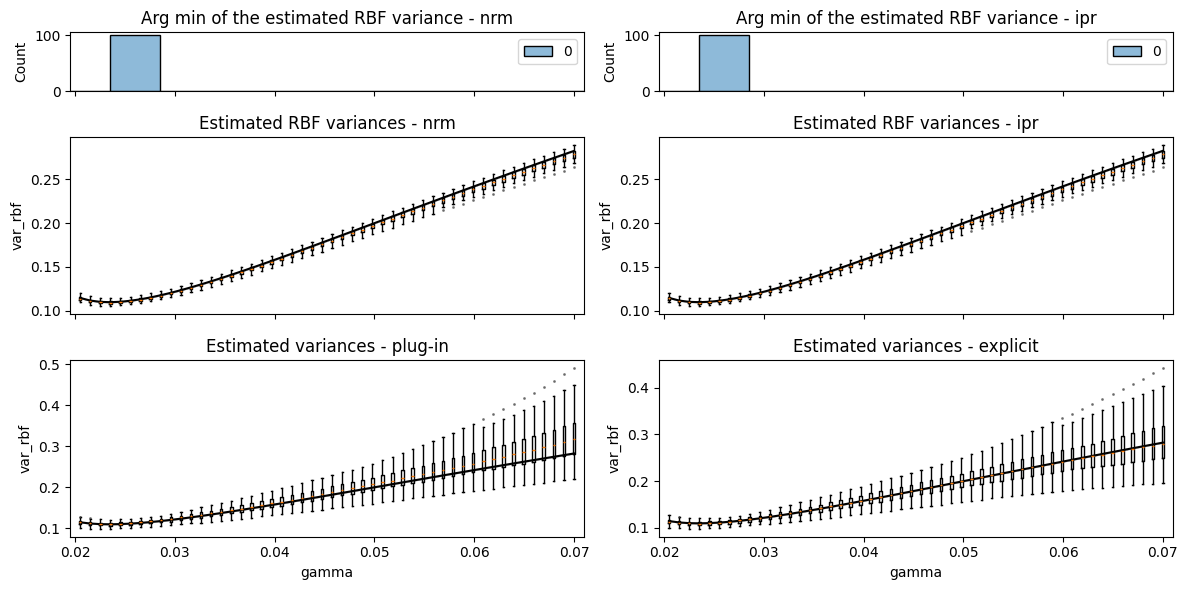

p = 20


/tmp/ipykernel_326499/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])
/tmp/ipykernel_326499/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])


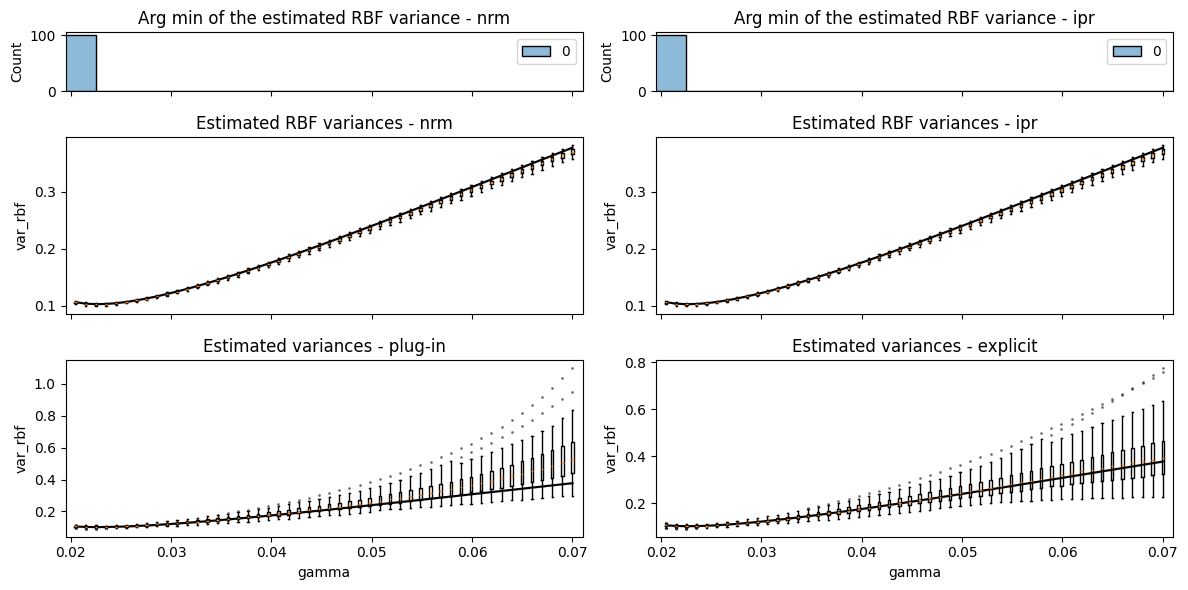

p = 50


/tmp/ipykernel_326499/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])
/tmp/ipykernel_326499/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])


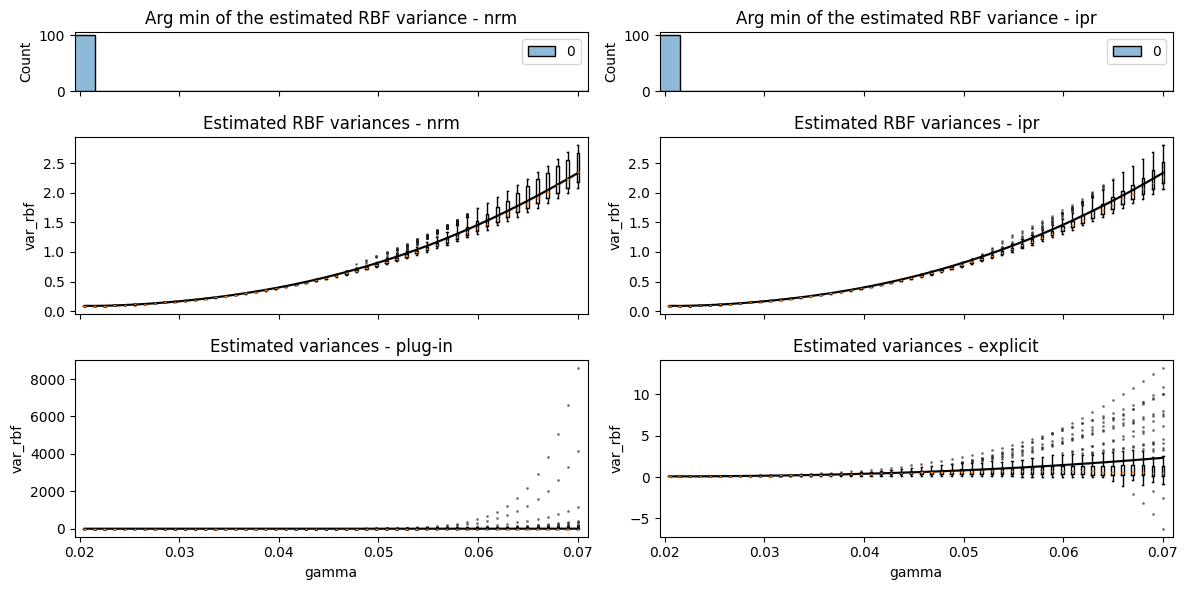

p = 100


/tmp/ipykernel_326499/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])
/tmp/ipykernel_326499/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])


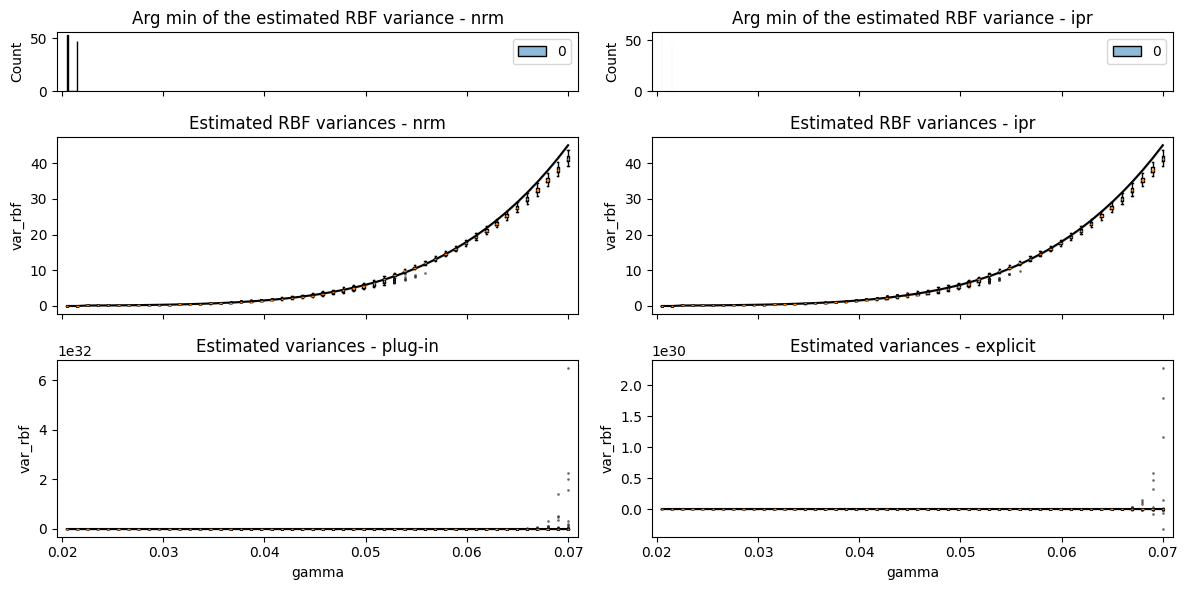

In [8]:
for i in [int(i) for i in [5, 10, 15, 20, 50, 100]]:
    print('p = '+str(i))
    plot_boxplots(res[res['p'] == i], gamma_seq)

In [9]:
params = {'beta': [1],
          'n_plus': [500],
          'n_minus': [500], 
          'n_target': [500], 
          'pi_target': [0.5],
          'p': [int(i) for i in [20, 50, 100]],
          'seed': [int(i) for i in np.linspace(1, 10, 10)]}

In [10]:
df_params = pd.DataFrame(itertools.product(*params.values()),columns=params.keys())

In [11]:
gamma_seq = np.linspace(0.0005, 0.05, 50)

In [ ]:
res = simulation_gamma(df_params, generate_sample_Nstd_Nstd_CC, params.keys(), gamma_seq,
           ['pi_nmr_u', 'pi_ipr_u',
            'var_plug-in', 'var_explicit', 
            'var_rbf', 'var_rbf_estimate'])

  0%|          | 0/30 [00:00<?, ?it/s]

 63%|██████▎   | 19/30 [00:02<00:01,  8.65it/s]/home/gosia/miniconda3/envs/rhks/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2430: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/gosia/miniconda3/envs/rhks/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2430: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
 70%|███████   | 21/30 [00:02<00:01,  8.01it/s]/home/gosia/miniconda3/envs/rhks/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2430: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/gosia/miniconda3/envs/rhks/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2430: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
 73%|███████▎  | 22/30 [00:02<00:01,  7.46it/s]/home/gosia/miniconda3/envs/rhks/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2430: RuntimeWarning: overflow encoun

p = 5


/tmp/ipykernel_326499/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])
/tmp/ipykernel_326499/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])


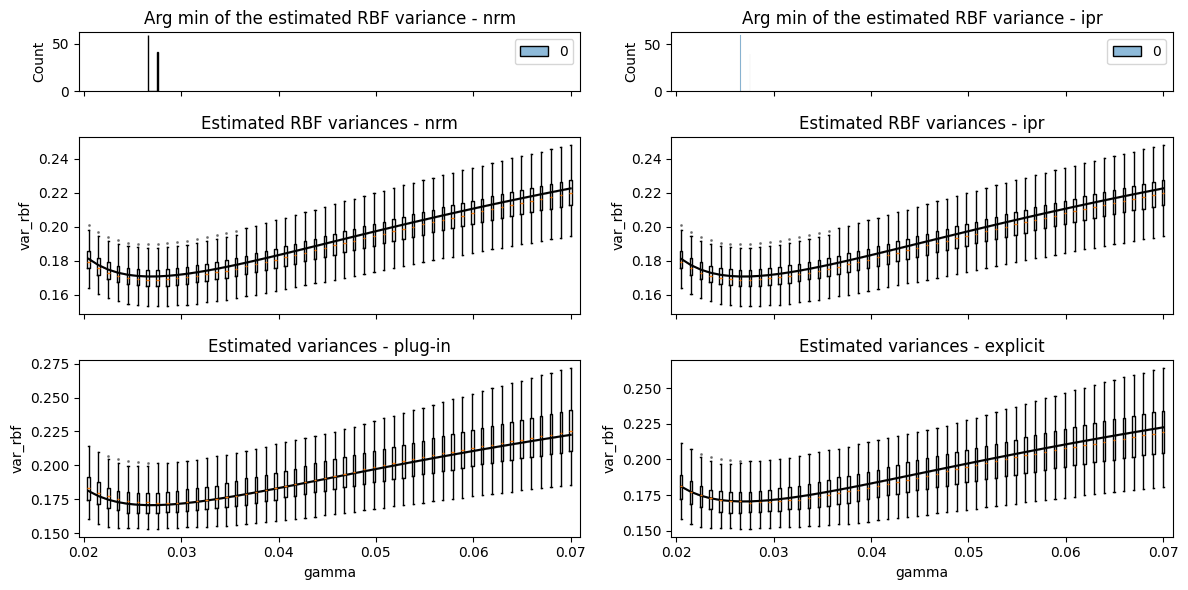

p = 10


/tmp/ipykernel_326499/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])
/tmp/ipykernel_326499/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])


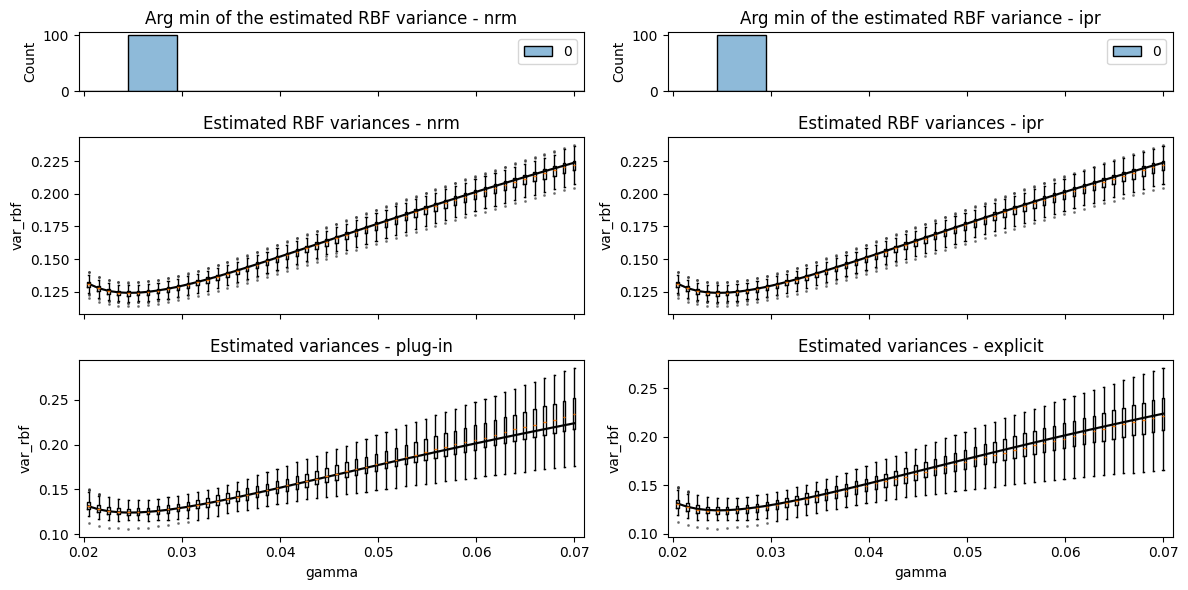

p = 15


/tmp/ipykernel_326499/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])
/tmp/ipykernel_326499/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])


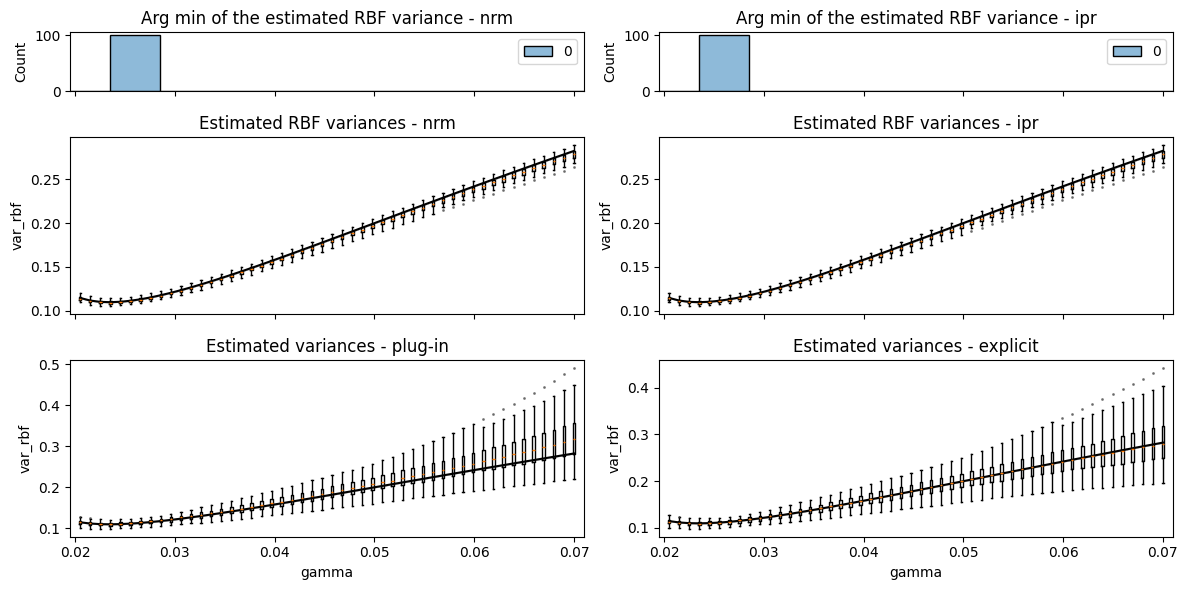

p = 20


/tmp/ipykernel_326499/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])
/tmp/ipykernel_326499/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])


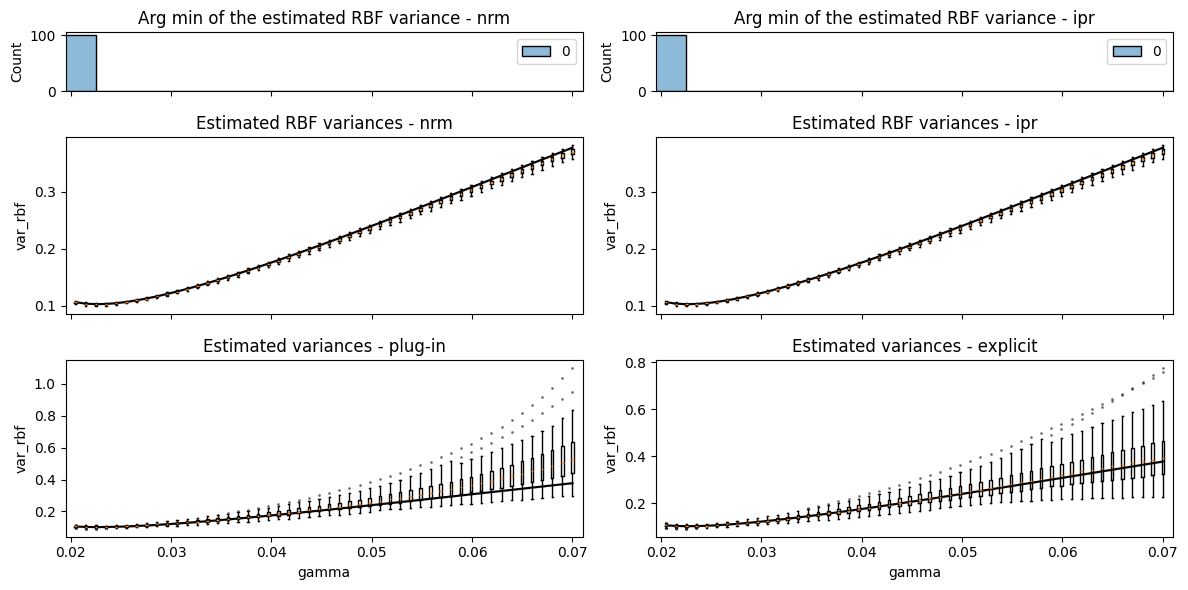

p = 50


/tmp/ipykernel_326499/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])
/tmp/ipykernel_326499/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])


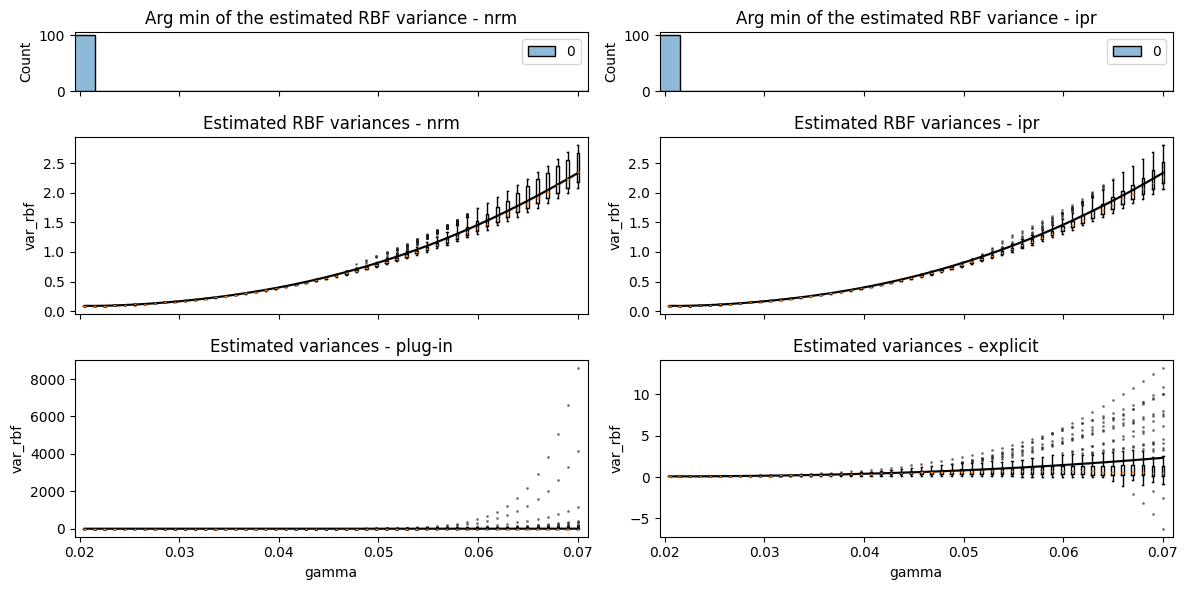

p = 100


/tmp/ipykernel_326499/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])
/tmp/ipykernel_326499/298527375.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,est_type_ind].set_xticklabels([f"{g:.2f}" for g in sorted(res['gamma'].unique())])


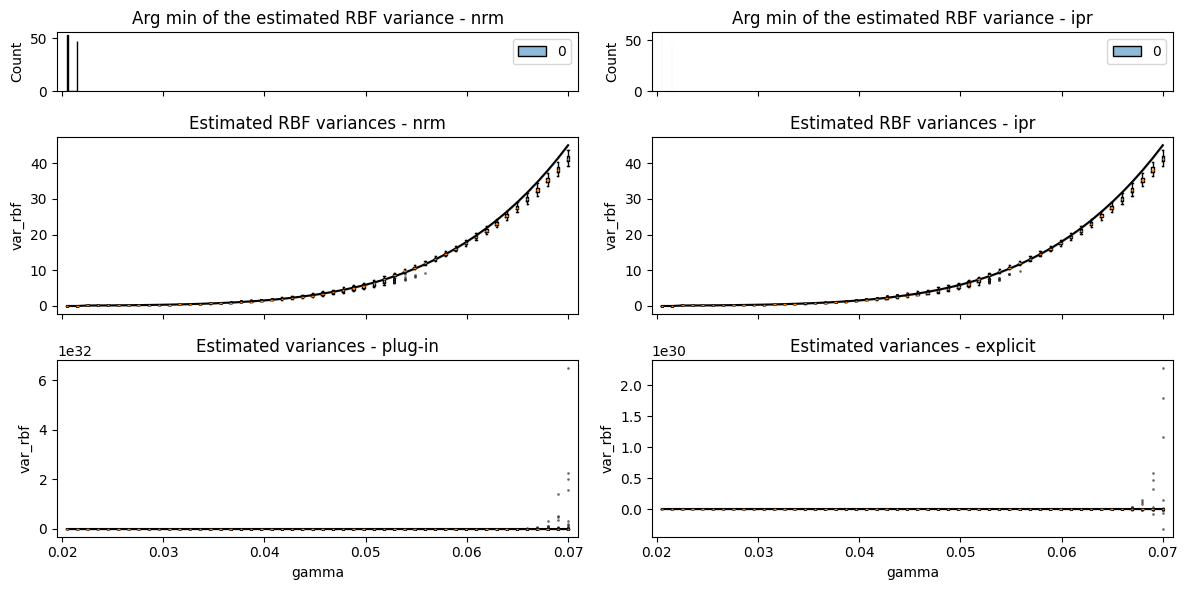

In [ ]:
for i in [int(i) for i in [5, 10, 15, 20, 50, 100]]:
    print('p = '+str(i))
    plot_boxplots(res[res['p'] == i], gamma_seq)